<a href="https://colab.research.google.com/github/HuzainAzis/knn-cv/blob/master/sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#load dataset
datatrain = pd.read_csv('/content/drive/My Drive/dataset/inggrid/dataset8020train-test/dataset8020train_10.csv')
datatest = pd.read_csv('/content/drive/My Drive/dataset/inggrid/dataset8020train-test/dataset8020test_10.csv')
#dataset.Type.value_count().plot(kind= "bar")
print (len(datatrain))
print (len(datatest))
datatrain

900
100


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1040,18996,1,179,129.0,140,90,3,3,0,0,0,1
1,1041,21298,1,159,63.0,110,70,3,3,0,0,1,1
2,1043,19681,2,165,72.0,120,80,1,1,0,0,1,1
3,1045,21023,1,170,81.0,170,90,3,3,0,0,0,1
4,1052,22801,1,164,79.0,130,80,3,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1101,17285,1,167,75.0,100,70,1,1,0,0,1,0
896,1106,16003,1,159,77.0,120,80,1,1,0,0,1,0
897,1107,22826,1,162,65.0,140,90,3,3,0,0,1,0
898,1111,23203,2,172,74.0,140,70,2,1,1,0,1,0


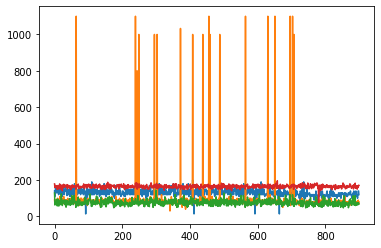

In [4]:
sns.lineplot(data=datatrain['ap_hi'])
sns.lineplot(data=datatrain['ap_lo'])
sns.lineplot(data=datatrain['weight'])
sns.lineplot(data=datatrain['height'])


In [0]:
#split target and attribute

x_train = datatrain.iloc[:, 1:12]
y_train = datatrain.iloc[:, 12]
x_test = datatest.iloc[:, 1:12]
y_test = datatest.iloc[:, 12]



Text(0.5, 1.0, 'testing')

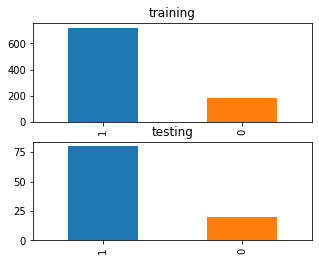

In [6]:
plt.figure(figsize=(5,4))
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')

In [7]:
# scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test =sc_x.fit_transform(x_test)
x_train

array([[-0.35119491, -0.75      ,  1.72438997, ..., -0.32294656,
        -0.22941573, -1.84709629],
       [ 0.59399417, -0.75      , -0.64265185, ..., -0.32294656,
        -0.22941573,  0.54139029],
       [-0.06993751,  1.33333333,  0.06746069, ..., -0.32294656,
        -0.22941573,  0.54139029],
       ...,
       [ 1.22138293, -0.75      , -0.28759558, ..., -0.32294656,
        -0.22941573,  0.54139029],
       [ 1.37617715,  1.33333333,  0.89592533, ...,  3.09648757,
        -0.22941573,  0.54139029],
       [ 1.17416454,  1.33333333,  0.77757324, ..., -0.32294656,
        -0.22941573, -1.84709629]])

In [8]:
math.sqrt(900)

30.0

In [24]:
akurasi = 0
ax = np.array([])
px = np.array([])
rx = np.array([])
fx = np.array([])
for x in range(2,900): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    ax = np.append(ax,accuracy_score(y_test, y_pred))
    px = np.append(px,precision_score(y_test, y_pred))
    rx = np.append(rx,recall_score(y_test, y_pred))
    fx = np.append(fx,f1_score(y_test, y_pred))
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred,average=None)
        r = recall_score(y_test, y_pred,average=None)
        f = f1_score(y_test, y_pred,average=None)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")
print(len(ax))
print(len(px))
print(len(rx))
print(len(fx))


K : 5
[[12  8]
 [ 1 79]]
Akurasi : 0.91
presisi : [0.92307692 0.90804598]
recall : [0.6    0.9875]
F-Score : [0.72727273 0.94610778]
--------------------------------------------
898
898
898
898


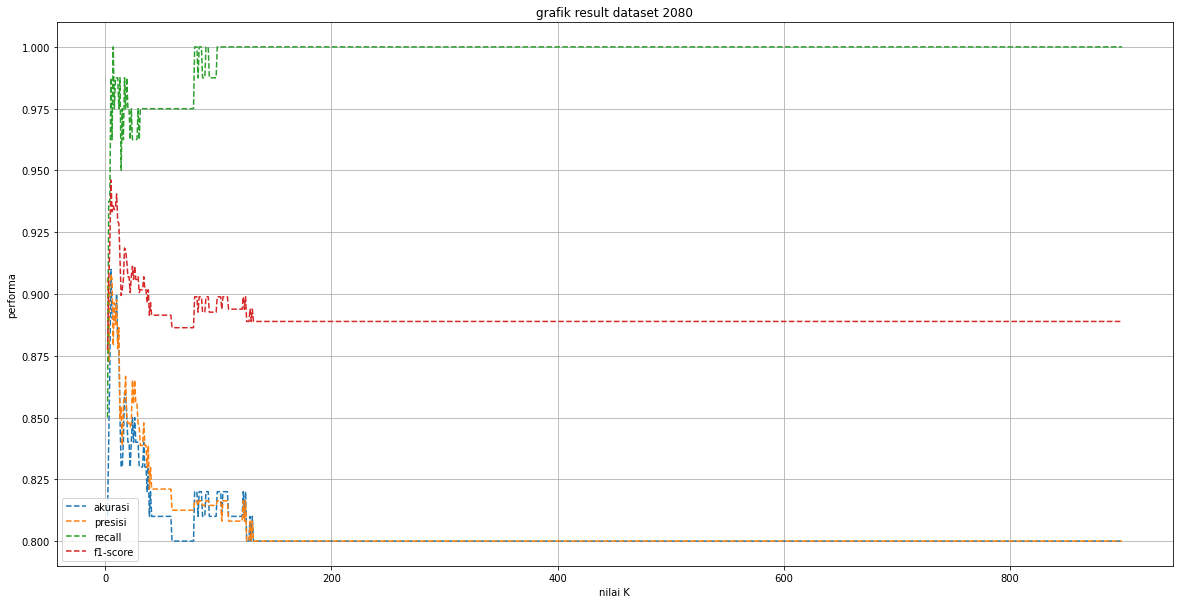

In [36]:
from matplotlib import pyplot as plot
plt.figure(figsize=(20,10))
x = np.arange(start=2, stop=900)
plt.plot(x, ax, '--')
plt.plot(x, px, '--')
plt.plot(x, rx, '--')
plt.plot(x, fx, '--')
plt.title("grafik result dataset 2080")
plt.xlabel("nilai K")
plt.ylabel("performa")
plt.legend(["akurasi","presisi", "recall", "f1-score"])
plt.grid()
plt.show()

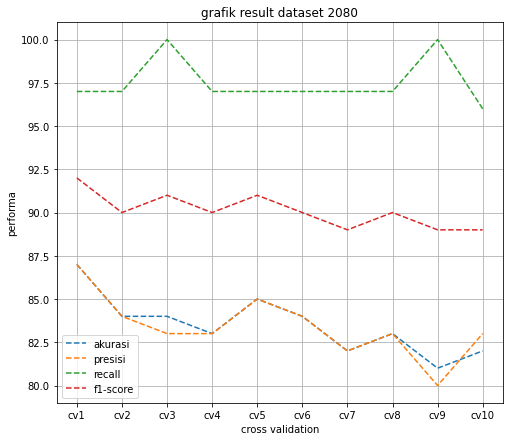

In [0]:
from matplotlib import pyplot as plot
plt.figure(figsize=(8,7))
x = ["cv1", "cv2", "cv3", "cv4", "cv5", "cv6", "cv7", "cv8", "cv9", "cv10"]
a= [87,84,84,83,85,84,82,83,81,82]
p= [87,84,83,83,85,84,82,83,80,83]
r= [97,97,100,97,97,97,97,97,100,96]
f= [92,90,91,90,91,90,89,90,89,89]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset 2080")
plt.xlabel("cross validation")
plt.ylabel("performa")
plt.legend(["akurasi","presisi", "recall", "f1-score"])
plt.grid()
plt.show()

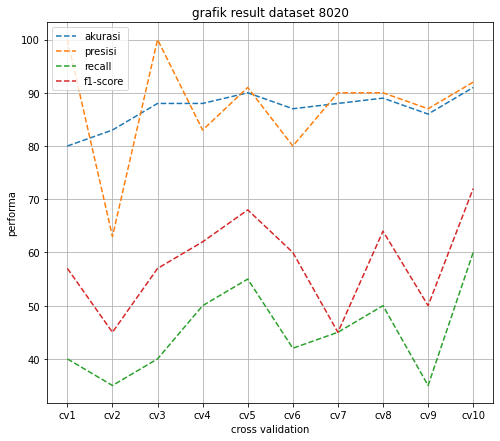

In [0]:
from matplotlib import pyplot as plot
plt.figure(figsize=(8,7))
x = ["cv1", "cv2", "cv3", "cv4", "cv5", "cv6", "cv7", "cv8", "cv9", "cv10"]
a= [80,83,88,88,90,87,88,89,86,91]
p= [100,63,100,83,91,80,90,90,87,92]
r= [40,35,40,50,55,42,45,50,35,60]
f= [57,45,57,62,68,60,45,64,50,72]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset 8020")
plt.xlabel("cross validation")
plt.ylabel("performa")
plt.legend(["akurasi","presisi", "recall", "f1-score"])
plt.grid()
plt.show()

In [0]:
k =  357
[[47  3]
 [21 29]]
Akurasi : 0.76
presisi : 0.90625
recall : 0.58
F-Score : 0.7073170731707317
--------------------------------------------
k =  357
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 0.0
recall : 0.0
F-Score : 0.0
dataset2080train_1
--------------------------------------------
k =  357
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 0.0
recall : 0.0
F-Score : 0.0
--------------------------------------------
k =  357
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 0.0
recall : 0.0
F-Score : 0.0
--------------------------------------------
k =  357
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 0.0
recall : 0.0
F-Score : 0.0
--------------------------------------------
k =  357
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 0.0
recall : 0.0
F-Score : 0.0
--------------------------------------------
k =  357
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 0.0
recall : 0.0
F-Score : 0.0
--------------------------------------------
k =  357
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 0.0
recall : 0.0
F-Score : 0.0
--------------------------------------------
k =  357
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 0.0
recall : 0.0
F-Score : 0.0
--------------------------------------------
k =  357
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 0.0
recall : 0.0
F-Score : 0.0
--------------------------------------------
k =  357
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 0.0
recall : 0.0
F-Score : 0.0
--------------------------------------------

[[87, 60, 79, 84, 83, 80, 81, 78, 74, 79], [82, 81, 66, 79, 83, 80, 78, 82, 80, 78], [84, 80, 81, 80, 80, 80, 80, 80, 80, 80], [82, 81, 66, 79, 83, 80, 78, 82, 80, 78], [85, 61, 82, 78, 84, 79, 80, 85, 79, 78], [84, 84, 80, 82, 80, 81, 81, 80, 81, 83], [80, 82, 63, 79, 83, 80, 80, 81, 80, 80], [83, 79, 64, 80, 81, 80, 83, 80, 80, 80], [81, 80, 81, 80, 80, 80, 80, 80, 80, 80], [82, 85, 62, 81, 80, 84, 79, 84, 81, 80]]


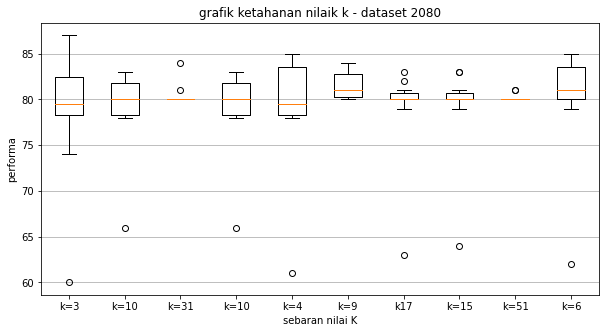

In [0]:
fig1, ax1 = plt.subplots(figsize=(10,5))

# perubahan nilai k
all_data = [
            [87,60,79,84,83,80,81,78,74,79],
            [82,81,66,79,83,80,78,82,80,78],
            [84,80,81,80,80,80,80,80,80,80],
            [82,81,66,79,83,80,78,82,80,78],
            [85,61,82,78,84,79,80,85,79,78],
            [84,84,80,82,80,81,81,80,81,83],
            [80,82,63,79,83,80,80,81,80,80],
            [83,79,64,80,81,80,83,80,80,80],
            [81,80,81,80,80,80,80,80,80,80],
            [82,85,62,81,80,84,79,84,81,80],
          ]
print(all_data)

# plot box plot
ax1.boxplot(all_data)
ax1.set_title('grafik ketahanan nilaik k - dataset 2080')

#adding horizontal grid lines

ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('sebaran nilai K')
ax1.set_ylabel('performa')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'k=3','k=10','k=31','k=10','k=4','k=9','k17','k=15','k=51','k=6'])
plt.show()

[[83, 82, 88, 86, 81, 89, 88, 82, 86, 86], [87, 83, 86, 87, 90, 87, 86, 89, 86, 89], [83, 82, 88, 86, 81, 89, 88, 82, 86, 86], [84, 83, 87, 88, 82, 83, 88, 88, 82, 91], [87, 83, 86, 87, 90, 87, 86, 89, 86, 89], [87, 83, 86, 87, 90, 87, 86, 89, 86, 89], [84, 83, 87, 88, 82, 83, 88, 88, 82, 91], [89, 75, 79, 84, 85, 85, 79, 79, 84, 84], [87, 83, 86, 87, 90, 87, 86, 89, 86, 89], [84, 83, 87, 88, 82, 83, 88, 88, 82, 91]]


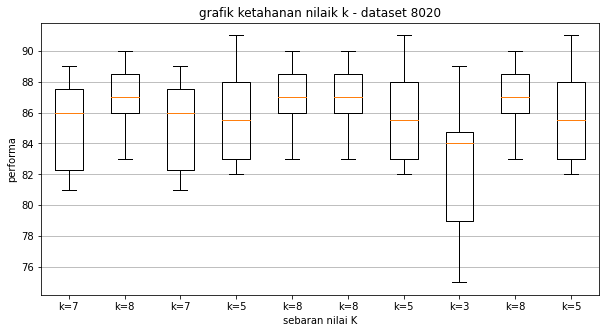

In [0]:
fig1, ax1 = plt.subplots(figsize=(10,5))

# perubahan nilai k
all_data = [
            [83,82,88,86,81,89,88,82,86,86],
            [87,83,86,87,90,87,86,89,86,89],
            [83,82,88,86,81,89,88,82,86,86],
            [84,83,87,88,82,83,88,88,82,91],
            [87,83,86,87,90,87,86,89,86,89],
            [87,83,86,87,90,87,86,89,86,89],
            [84,83,87,88,82,83,88,88,82,91],
            [89,75,79,84,85,85,79,79,84,84],
            [87,83,86,87,90,87,86,89,86,89],
            [84,83,87,88,82,83,88,88,82,91]
          ]
print(all_data)

# plot box plot
ax1.boxplot(all_data)
ax1.set_title('grafik ketahanan nilaik k - dataset 8020')

#adding horizontal grid lines

ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('sebaran nilai K')
ax1.set_ylabel('performa')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'k=7','k=8','k=7','k=5','k=8','k=8','k=5','k=3','k=8','k=5'])
plt.show()